In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("ai_job_dataset.csv")

In [11]:
df_cleaned = df.dropna()

In [12]:
df_longer = df_cleaned.melt(
    id_vars=['salary_currency', 'experience_level'],
    value_vars='job_title',
    var_name="jobs"
)

In [13]:
df_pivot = df_longer.pivot_table(
    index=['salary_currency', 'experience_level'],
    columns="jobs",
    aggfunc="count"
)

In [14]:
df_sorted = df_pivot.sort_values(by=('value', 'job_title'), ascending=False)

In [15]:
df_stacked = df_sorted.stack().reset_index()

C:\Users\lazar\AppData\Local\Temp\ipykernel_11344\335858879.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_stacked = df_sorted.stack().reset_index()


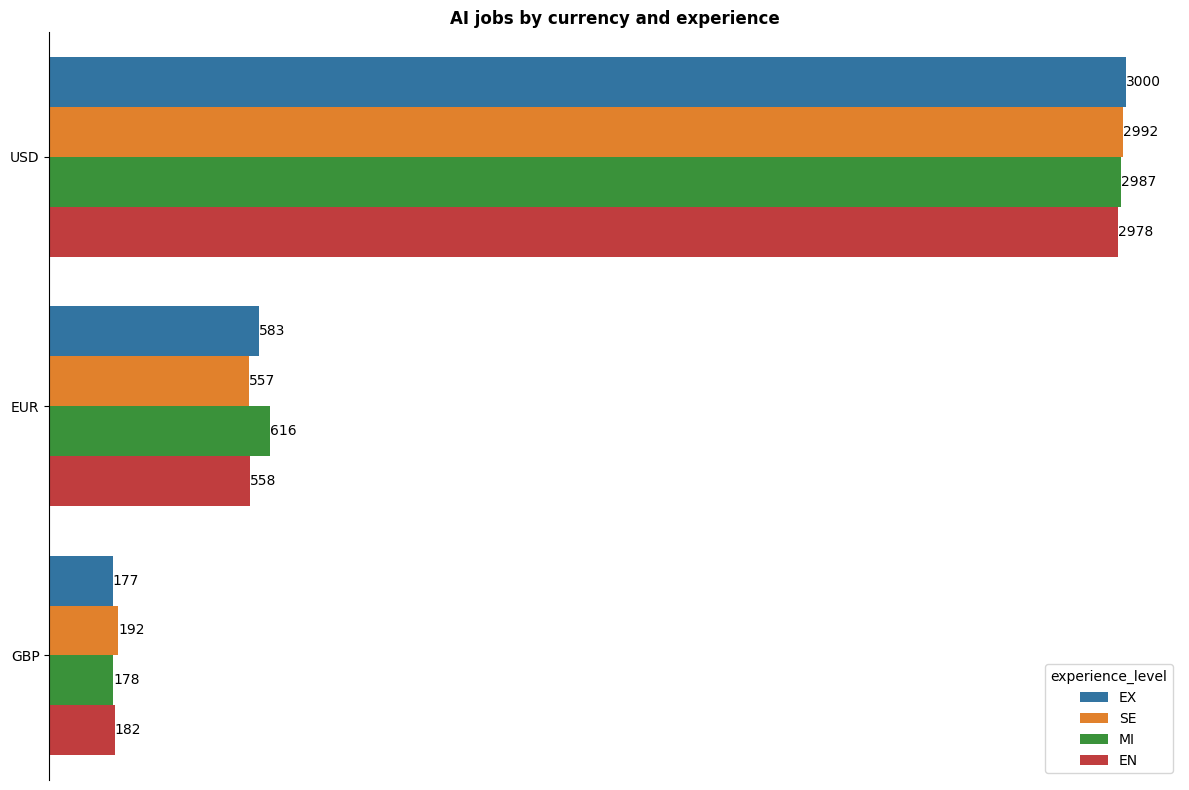

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    ax=ax,
    data=df_stacked,
    orient="h",
    x='value',
    y='salary_currency',
    hue='experience_level'
)

for container in ax.containers:
    ax.bar_label(container, fmt="%0.f")

ax.set_title("AI jobs by currency and experience", fontweight="bold")
ax.set_ylabel("")
ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)

plt.savefig("my-plot.png")
plt.tight_layout()
plt.show()